In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm
import numpy as np

In [2]:
cc_apps = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\cc_approval.csv')

In [3]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
cc_apps.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [6]:
cc_apps.drop(['DriversLicense','ZipCode'], axis=1, inplace=True)

In [7]:
cc_apps.Approved.value_counts()

0    383
1    307
Name: Approved, dtype: int64

In [8]:
categorical = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault','Employed','Citizen']

In [9]:
df_dummies = pd.get_dummies(cc_apps[['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault','Employed','Citizen', 'Approved']])

<AxesSubplot:>

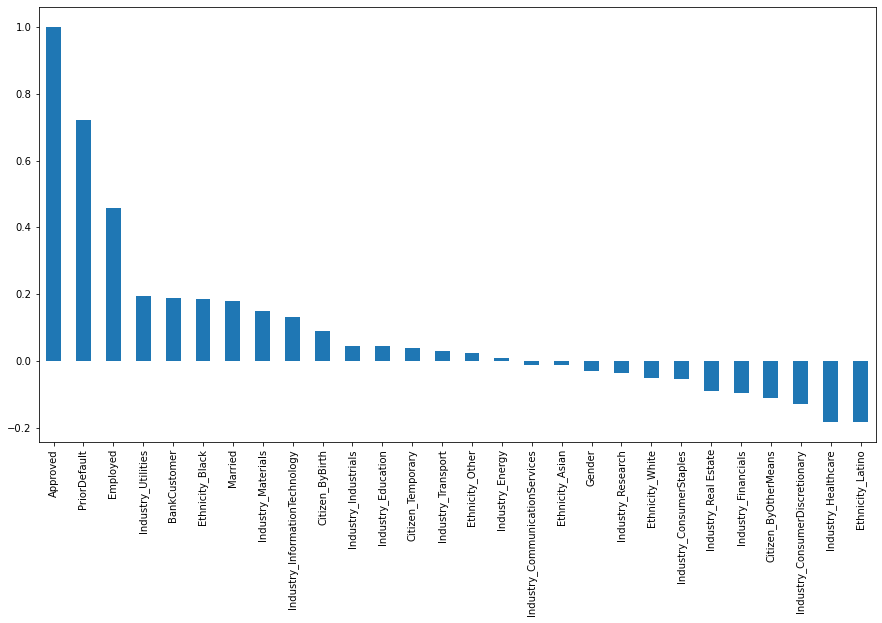

In [10]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Approved'].sort_values(ascending = False).plot(kind='bar')

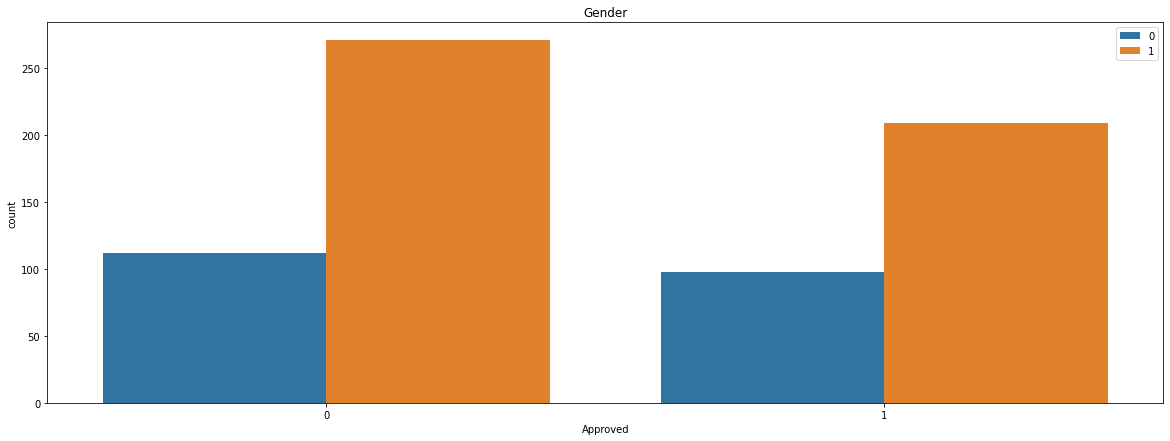

Gender  p-value  0.44723087514133186  Bad Predictor. There is no significant relationship between the variables


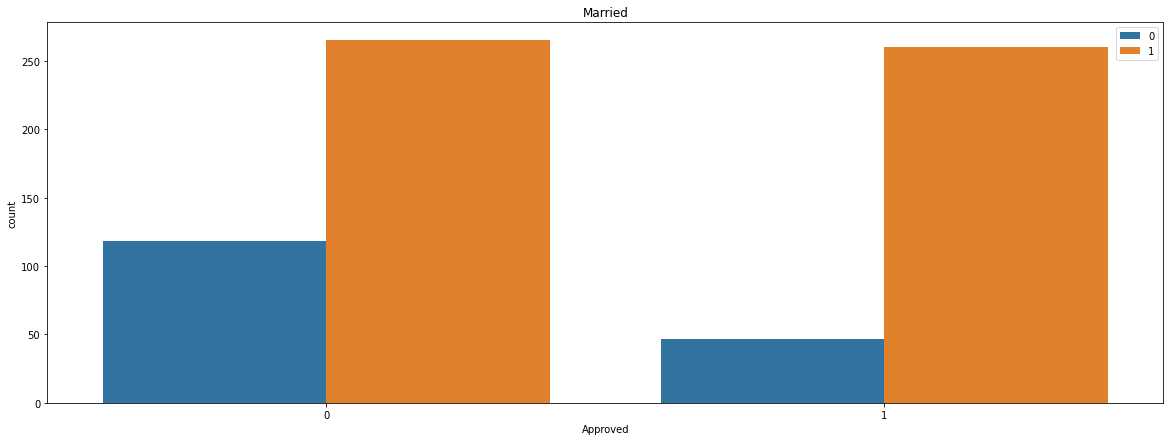

Married  p-value  2.100231920165588e-06  Good Predictor. There is significant relationship between the variables


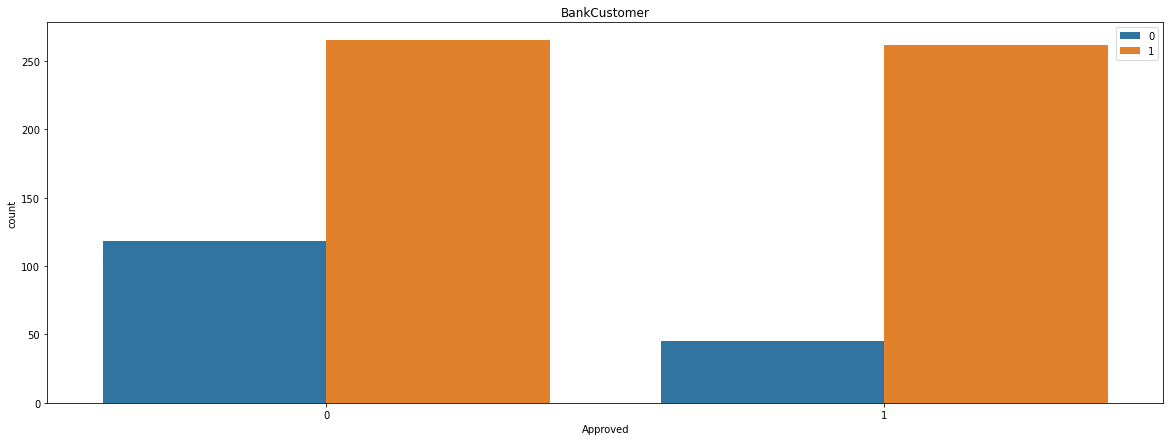

BankCustomer  p-value  6.91661320541803e-07  Good Predictor. There is significant relationship between the variables


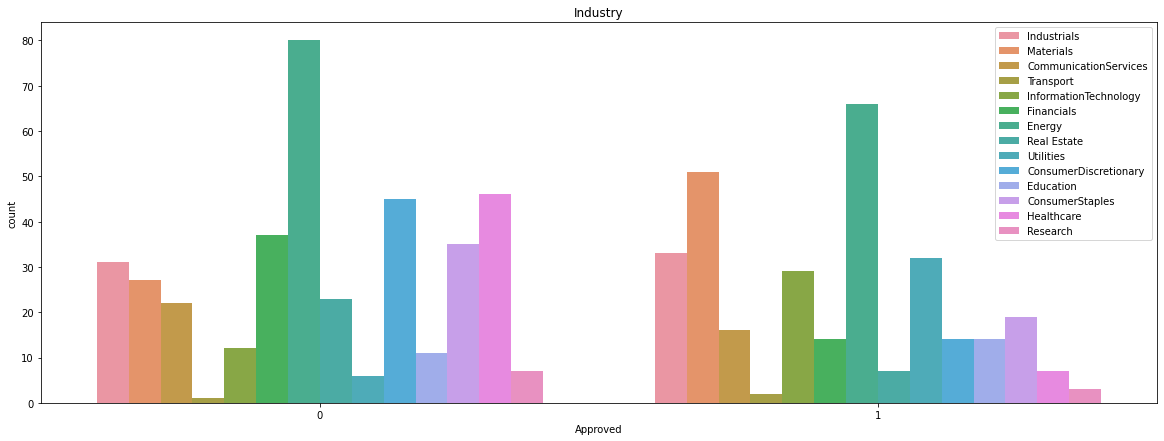

Industry  p-value  3.502987066102042e-15  Good Predictor. There is significant relationship between the variables


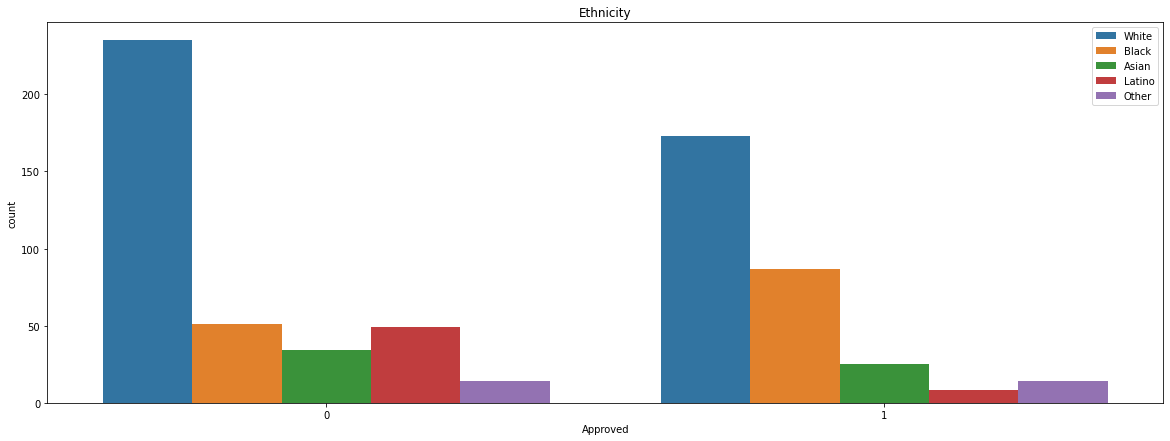

Ethnicity  p-value  1.823665654934685e-08  Good Predictor. There is significant relationship between the variables


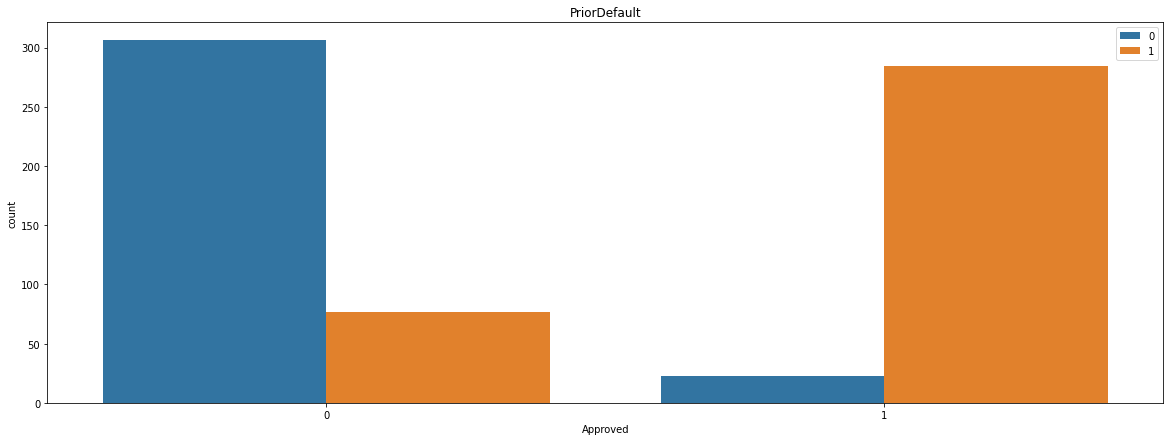

PriorDefault  p-value  7.298530125411298e-80  Good Predictor. There is significant relationship between the variables


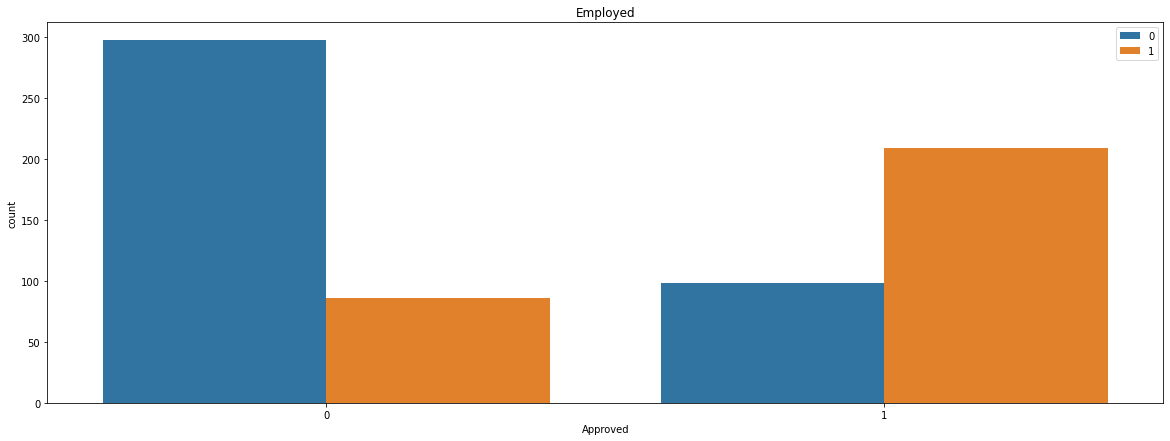

Employed  p-value  2.227269345312281e-33  Good Predictor. There is significant relationship between the variables


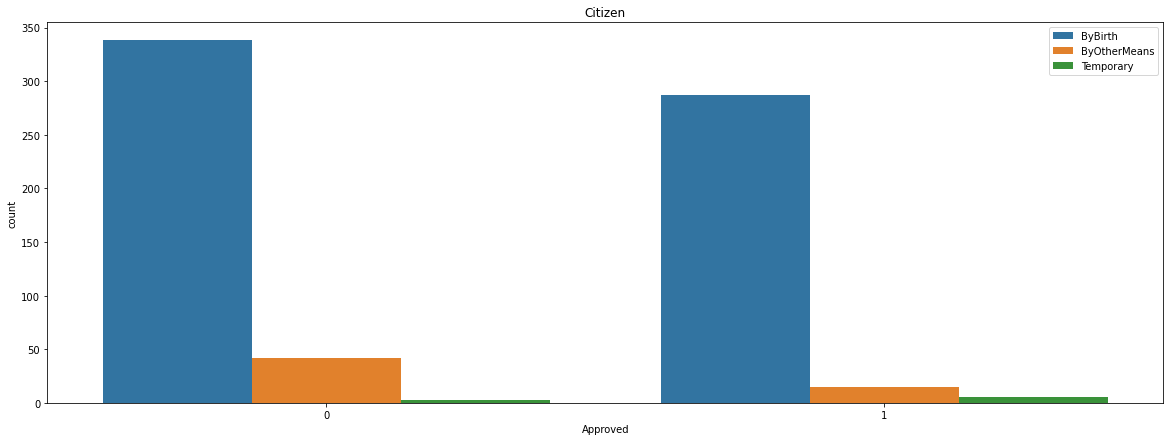

Citizen  p-value  0.010094291370456362  Good Predictor. There is significant relationship between the variables


In [11]:
for column in categorical:
    plt.figure(figsize=(20,7))
    sns.countplot(x = cc_apps.Approved, hue= cc_apps[column])
    plt.title(column)
    plt.legend(loc='best')
    plt.show()
    crstab = pd.crosstab(cc_apps['Approved'],cc_apps[column])
    (stats, p, df,_) = chi2_contingency([crstab.iloc[0].values, crstab.iloc[1].values], correction=False)
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
    else:
        print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [12]:
del cc_apps['Gender']

In [13]:
continuous = ['Age','Debt','YearsEmployed','CreditScore','Income']

Age  p-value  1.479154858352859e-05  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


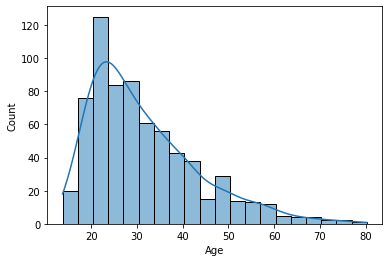

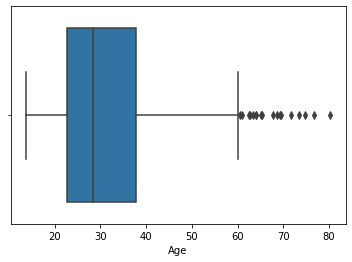

Debt  p-value  4.5516807023089123e-08  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


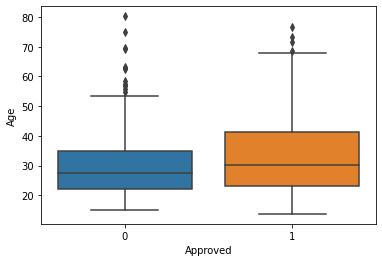

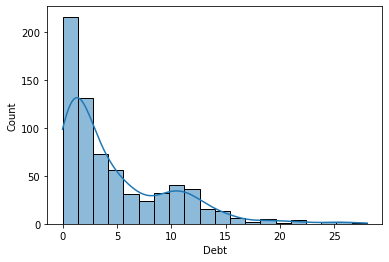

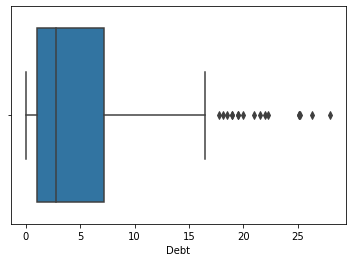

YearsEmployed  p-value  3.6710537401606784e-18  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


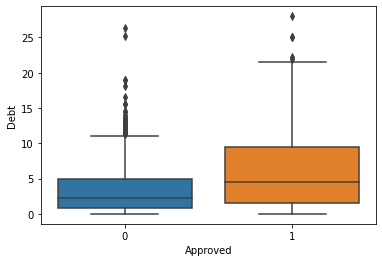

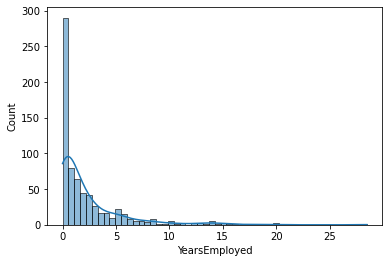

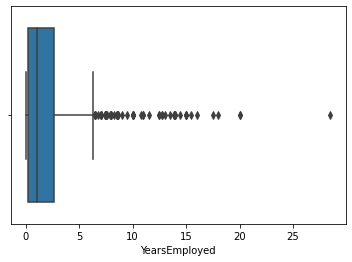

CreditScore  p-value  7.957718568080603e-29  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


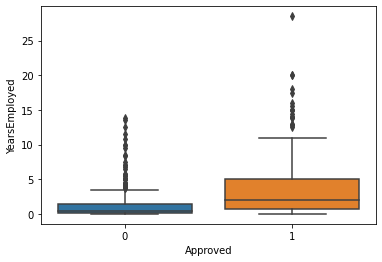

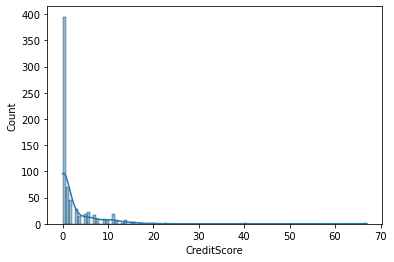

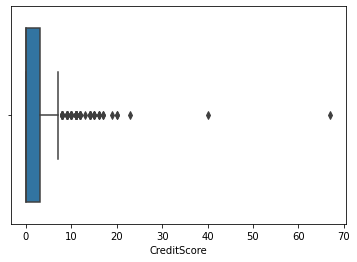

Income  p-value  3.4520256956293263e-06  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


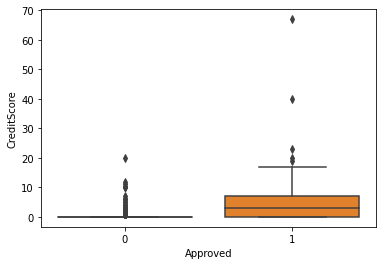

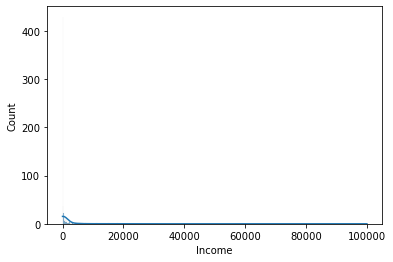

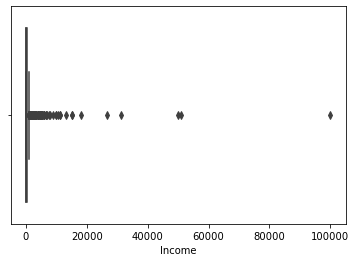

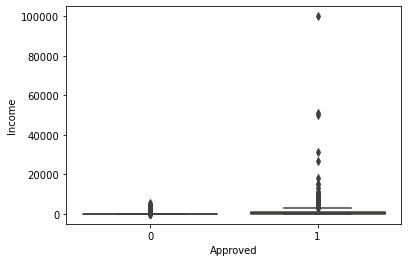

In [14]:
for column in continuous:
    model = ols('cc_apps[column]~Approved', data = cc_apps).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. Avg of this feature is same for both card approved group and not approved group")
    else:
        print(column,"","p-value","",p," Good Predictor. Avg of this feature is not same for both card approved group and not approved group")
    plt.figure()
    sns.histplot(x = cc_apps[column], kde=True)
    plt.show()
    sns.boxplot(x = cc_apps[column], orient = 'h')
    plt.show()
    sns.boxplot(y = cc_apps[column], x = cc_apps.Approved)

In [15]:
from scipy.stats import iqr

In [16]:
iqr_debt = iqr(cc_apps.Debt)
up_debt = cc_apps.Debt.quantile(0.75) + iqr_debt
cc_apps['Debt'] = np.where(cc_apps.Debt>up_debt,20,cc_apps.Debt)

In [17]:
iqr_age = iqr(cc_apps.Age)
up_age = cc_apps.Age.quantile(0.75) + iqr_age
cc_apps['Age'] = np.where(cc_apps.Age>up_age,65,cc_apps.Age)

In [18]:
iqr_ye = iqr(cc_apps.YearsEmployed)
up_ye = cc_apps.YearsEmployed.quantile(0.75) + iqr_ye
cc_apps['YearsEmployed'] = np.where(cc_apps.YearsEmployed>up_ye,8,cc_apps.YearsEmployed)

In [19]:
iqr_cs = iqr(cc_apps.CreditScore)
up_cs = cc_apps.CreditScore.quantile(0.75) + iqr_cs
cc_apps['CreditScore'] = np.where(cc_apps.CreditScore>up_cs,65,cc_apps.CreditScore)

Age  p-value  5.596987383314632e-06  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


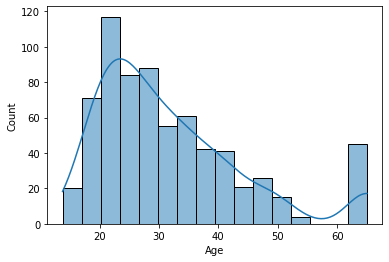

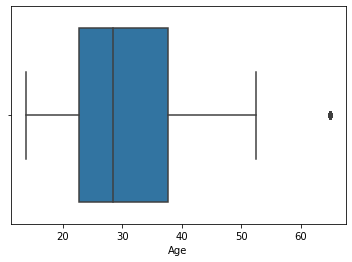

Debt  p-value  6.261680637097872e-08  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


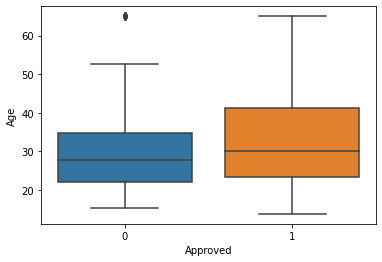

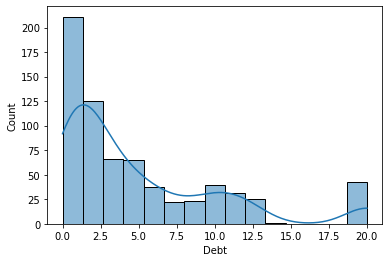

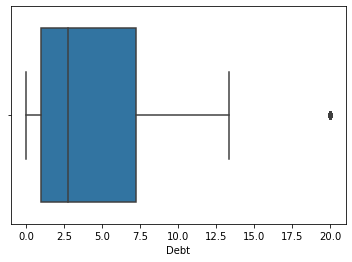

YearsEmployed  p-value  2.038136541809822e-22  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


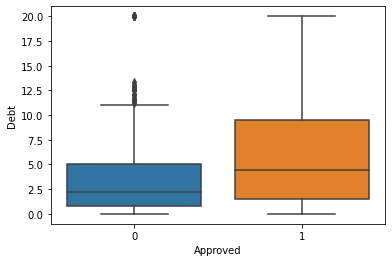

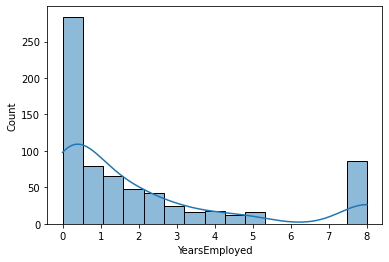

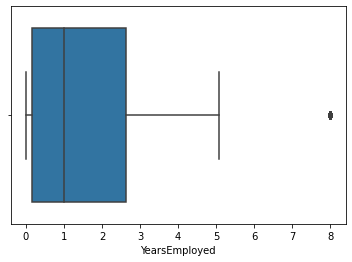

CreditScore  p-value  3.530224276510098e-28  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


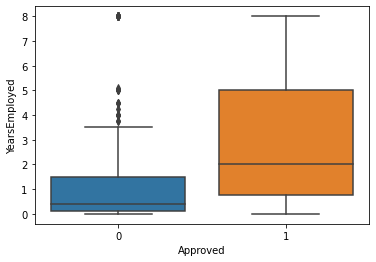

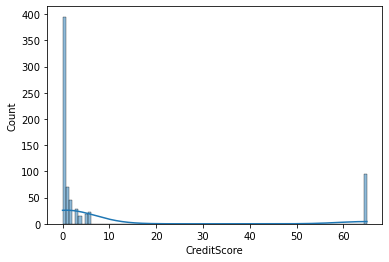

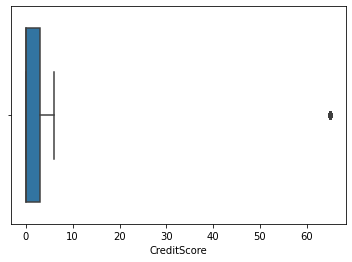

Income  p-value  3.4520256956293263e-06  Good Predictor. Avg of this feature is not same for both card approved group and not approved group


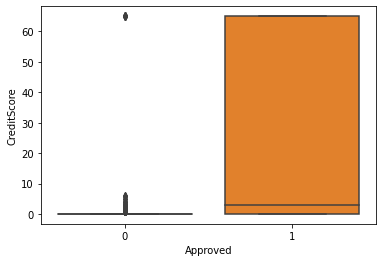

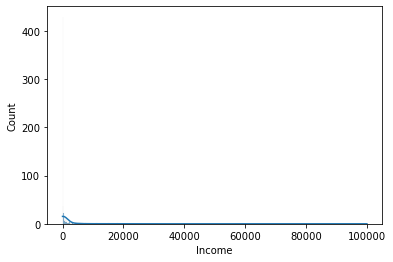

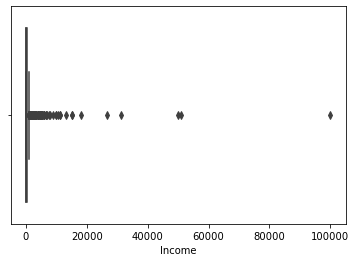

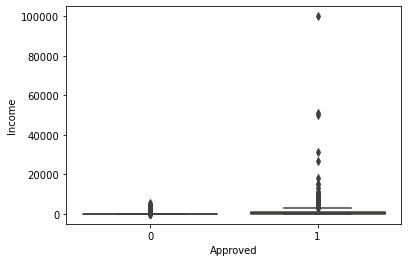

In [20]:
for column in continuous:
    model = ols('cc_apps[column]~Approved', data = cc_apps).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. Avg of this feature is same for both card approved group and not approved group")
    else:
        print(column,"","p-value","",p," Good Predictor. Avg of this feature is not same for both card approved group and not approved group")
    plt.figure()
    sns.histplot(x = cc_apps[column], kde=True, bins= 'auto')
    plt.show()
    sns.boxplot(x = cc_apps[column], orient = 'h')
    plt.show()
    sns.boxplot(y = cc_apps[column], x = cc_apps.Approved)

In [21]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            690 non-null    float64
 1   Debt           690 non-null    float64
 2   Married        690 non-null    int64  
 3   BankCustomer   690 non-null    int64  
 4   Industry       690 non-null    object 
 5   Ethnicity      690 non-null    object 
 6   YearsEmployed  690 non-null    float64
 7   PriorDefault   690 non-null    int64  
 8   Employed       690 non-null    int64  
 9   CreditScore    690 non-null    int64  
 10  Citizen        690 non-null    object 
 11  Income         690 non-null    int64  
 12  Approved       690 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 70.2+ KB


In [22]:
cc_apps.Married.value_counts()

1    525
0    165
Name: Married, dtype: int64

In [23]:
cc_apps.BankCustomer.value_counts()

1    527
0    163
Name: BankCustomer, dtype: int64

In [24]:
cc_apps.PriorDefault.value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [25]:
cc_apps.Employed.value_counts()

0    395
1    295
Name: Employed, dtype: int64

In [26]:
cc_apps.Industry.value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [27]:
cc_apps.Ethnicity.value_counts()

White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64

In [28]:
cc_apps.Citizen.value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

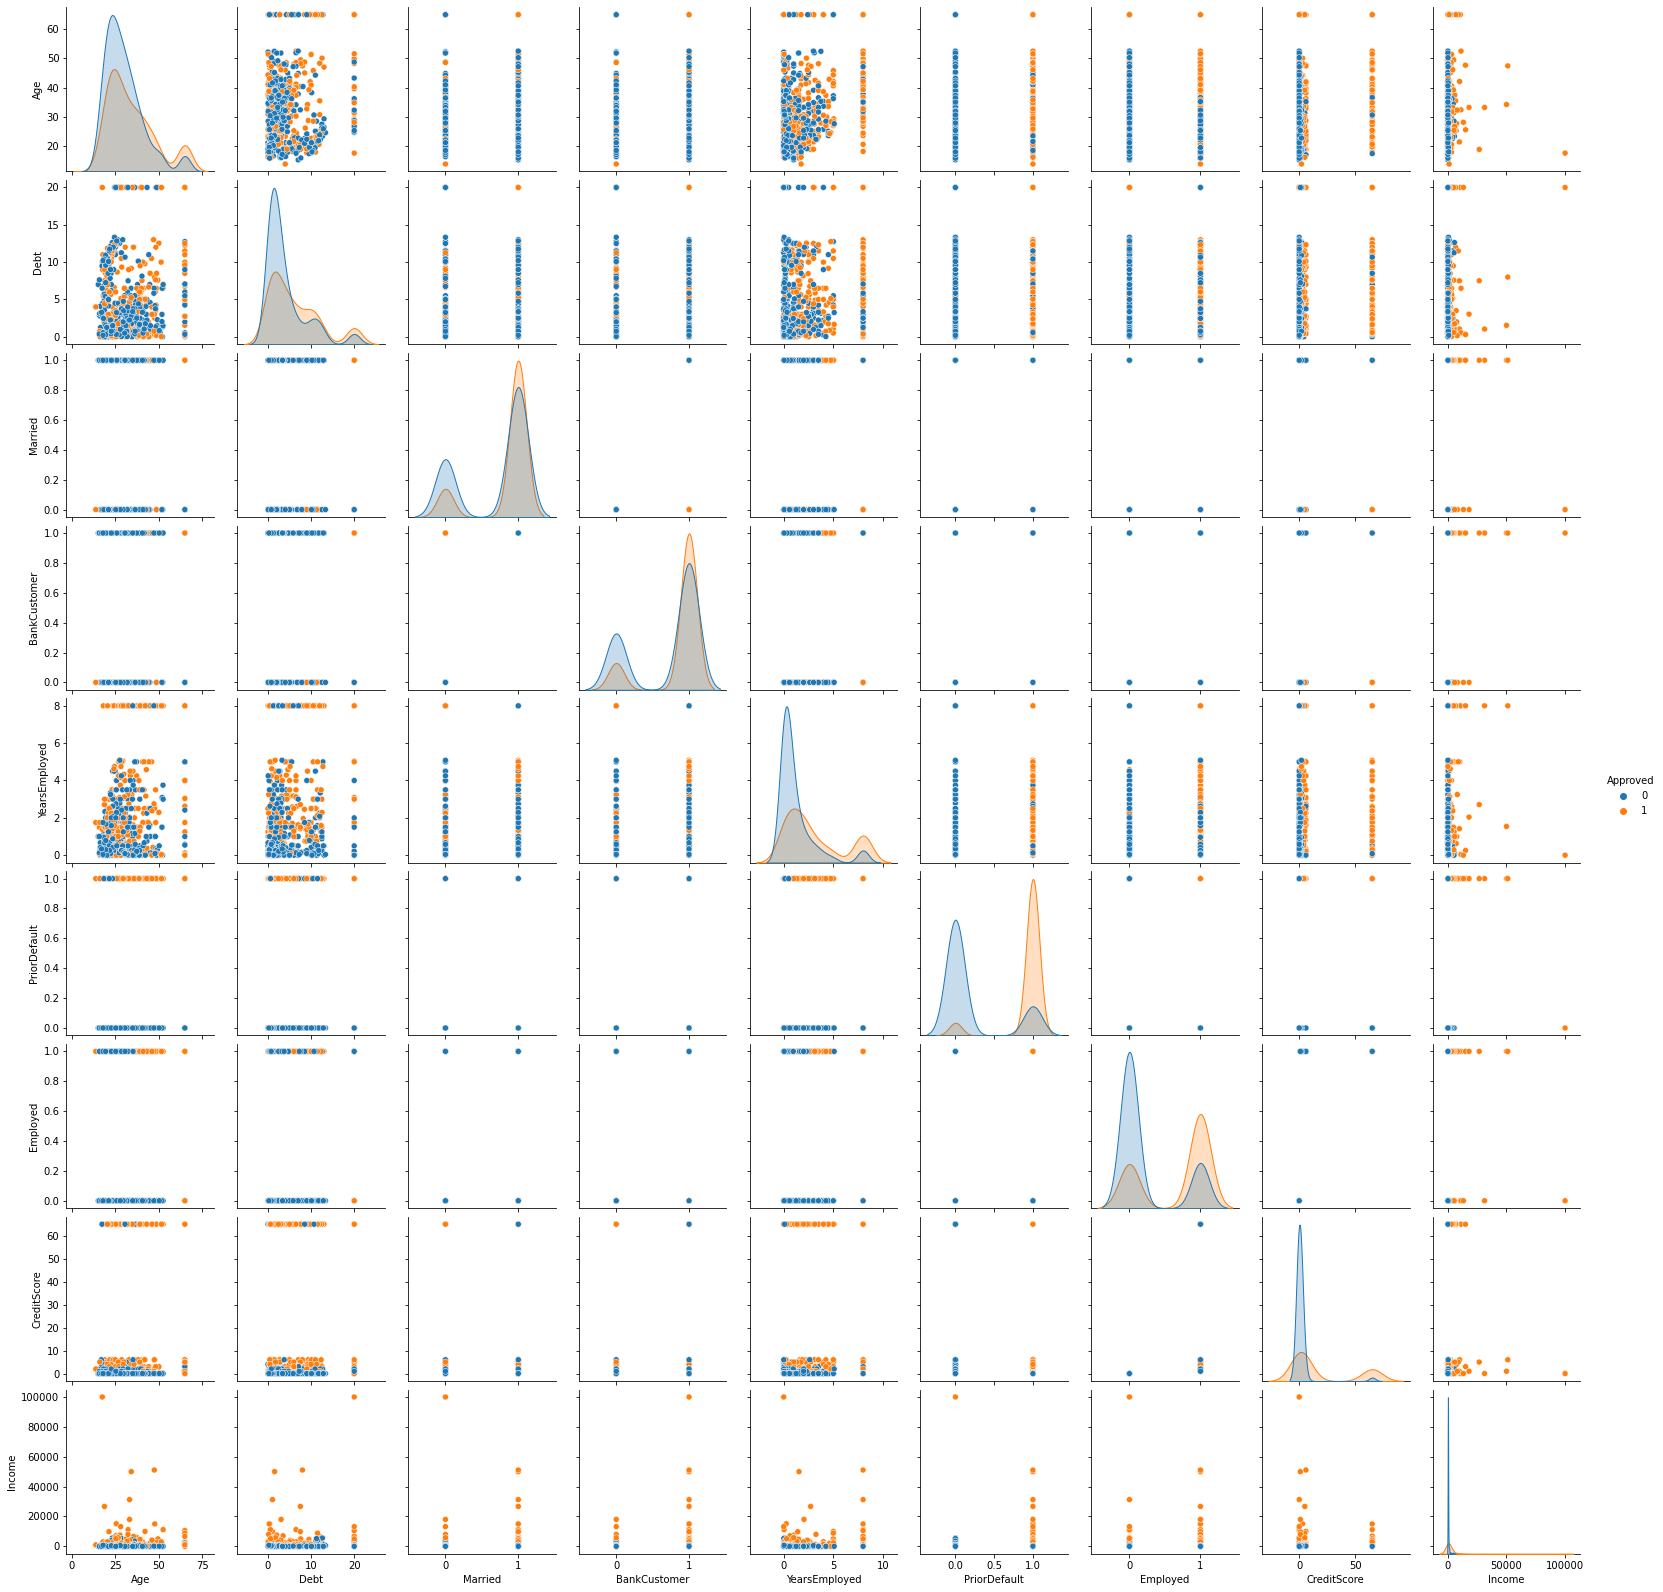

In [29]:
sns.pairplot(cc_apps, hue='Approved')

In [30]:
df_industry = pd.get_dummies(cc_apps['Industry'], drop_first=True, prefix = "Industry")

In [31]:
cc_apps = pd.concat([cc_apps,df_industry], axis = 1)

In [32]:
del cc_apps['Industry']

In [33]:
df_ethnicity = pd.get_dummies(cc_apps['Ethnicity'], drop_first=True, prefix = "Ethnicity")

In [34]:
cc_apps = pd.concat([cc_apps,df_ethnicity], axis = 1)

In [35]:
del cc_apps['Ethnicity']

In [36]:
df_citizen = pd.get_dummies(cc_apps['Citizen'], drop_first=True, prefix = "Citizen")

In [37]:
cc_apps = pd.concat([cc_apps,df_citizen], axis = 1)

In [38]:
del cc_apps['Citizen']

In [39]:
cc_apps.head()

,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByOtherMeans,Citizen_Temporary
0,30.83,0.000,1,1,1.25,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,65.00,4.460,1,1,3.04,1,1,6,560,1,...,0,0,0,0,1,0,0,0,0,0
2,24.50,0.500,1,1,1.50,1,0,0,824,1,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,1,1,3.75,1,1,5,3,1,...,0,0,0,0,0,0,0,1,0,0
4,20.17,5.625,1,1,1.71,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


## VIF Calculation

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x = cc_apps[['Age','Debt','YearsEmployed','CreditScore','Income']]

In [42]:
vif_data = pd.DataFrame()

In [43]:
vif_data['features'] = x.columns

In [44]:
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [45]:
vif_data

,features,VIF
0,Age,2.537544
1,Debt,2.057345
2,YearsEmployed,2.044570
3,CreditScore,1.355741
4,Income,1.051666


## Creating Model

In [46]:
x = cc_apps.iloc[:, cc_apps.columns != 'Approved']

In [47]:
y = cc_apps.iloc[:, cc_apps.columns == 'Approved']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 123)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
x_train = sc.fit_transform(x_train)

In [52]:
x_test = sc.fit_transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression(solver = 'liblinear', random_state = 123)

In [55]:
clf = model.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_pred = clf.predict(x_test)

In [57]:
clf.score(x_test,y_test)

0.8888888888888888

In [58]:
clf.intercept_

array([-0.52932906])

In [59]:
clf.coef_

array([[-0.09395674,  0.06362554, -0.07219946,  0.34186599,  0.22142702,
         1.71472869,  0.49129492,  0.27165503,  1.32656761, -0.24715567,
         0.00642917,  0.0398446 ,  0.18816599, -0.09343768, -0.67329749,
         0.16407143,  0.39429813,  0.1762717 , -0.08180884, -0.18957512,
        -0.01184427,  0.29463311,  0.15236492,  0.52219396,  0.21873319,
         0.02813385,  0.17457171,  0.2869512 ]])

In [60]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             690 non-null    float64
 1   Debt                            690 non-null    float64
 2   Married                         690 non-null    int64  
 3   BankCustomer                    690 non-null    int64  
 4   YearsEmployed                   690 non-null    float64
 5   PriorDefault                    690 non-null    int64  
 6   Employed                        690 non-null    int64  
 7   CreditScore                     690 non-null    int64  
 8   Income                          690 non-null    int64  
 9   Industry_ConsumerDiscretionary  690 non-null    uint8  
 10  Industry_ConsumerStaples        690 non-null    uint8  
 11  Industry_Education              690 non-null    uint8  
 12  Industry_Energy                 690 

# Creating Confusion Matrix

In [62]:
from sklearn import metrics

In [63]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [64]:
print(cm)

[[99 10]
 [13 85]]


In [65]:
cr = metrics.classification_report(y_test,y_pred)

In [66]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       109
           1       0.89      0.87      0.88        98

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



# ROC Curve

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
y_pred_proba = clf.predict_proba(x_test)

In [69]:
print(y_pred_proba)

[[9.52502586e-01 4.74974136e-02]
 [1.90022226e-02 9.80997777e-01]
 [9.24715517e-01 7.52844826e-02]
 [1.95527425e-01 8.04472575e-01]
 [9.87825411e-01 1.21745888e-02]
 [1.12017199e-02 9.88798280e-01]
 [9.89598450e-01 1.04015499e-02]
 [1.24917695e-01 8.75082305e-01]
 [9.80753266e-01 1.92467341e-02]
 [2.99487274e-01 7.00512726e-01]
 [8.80159083e-01 1.19840917e-01]
 [5.42503840e-01 4.57496160e-01]
 [3.49716720e-01 6.50283280e-01]
 [7.29308235e-02 9.27069176e-01]
 [1.30648033e-01 8.69351967e-01]
 [2.87081215e-05 9.99971292e-01]
 [2.26852158e-01 7.73147842e-01]
 [9.27643565e-01 7.23564347e-02]
 [4.72195392e-02 9.52780461e-01]
 [2.37468493e-01 7.62531507e-01]
 [1.52263939e-01 8.47736061e-01]
 [8.29362784e-01 1.70637216e-01]
 [8.76893444e-01 1.23106556e-01]
 [9.84742373e-02 9.01525763e-01]
 [8.44050424e-02 9.15594958e-01]
 [5.14536664e-01 4.85463336e-01]
 [2.55856769e-01 7.44143231e-01]
 [6.45550704e-01 3.54449296e-01]
 [6.63263576e-01 3.36736424e-01]
 [9.75101909e-01 2.48980911e-02]
 [8.459360

In [70]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])

In [71]:
roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])

In [72]:
from sklearn.metrics import log_loss

In [73]:
log_loss(y_test,y_pred)

3.8376804495519217

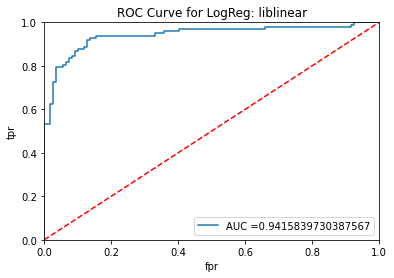

In [74]:
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc = 'best')
plt.show()